In [1]:
import scipy.stats as st
pd.set_option("display.max_columns",None)
import math
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
data=pd.read_csv("vgsales.csv")

In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
data.shape

(16598, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:

data['Global_Sales'][data["Name"]=="Madden NFL 2004"]==2013
data['Global_Sales'][data["Name"]=="FIFA Soccer 2004"]==2013
data['Global_Sales'][data["Name"]=="LEGO Batman: The Videogame"]==2008
# data=data.dropna()

394      False
431      False
436      False
1484     False
1498     False
1553     False
12572    False
Name: Global_Sales, dtype: bool

In [8]:
data.describe(include=['object','bool'])

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [9]:
# drop_index = data[data['Year']>2015].index
# data = data.drop(drop_index)

In [10]:
#the most game genre has been made
data["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

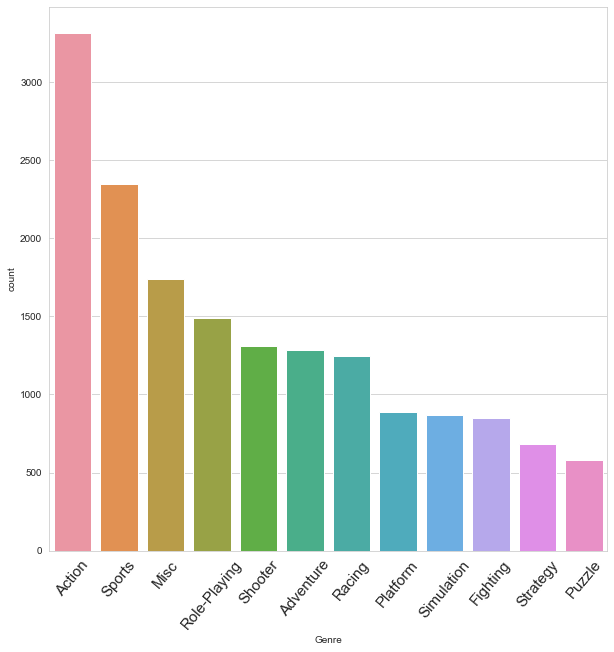

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x="Genre",data=data, order = data['Genre'].value_counts().index)
plt.xticks(size=15, rotation = 50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

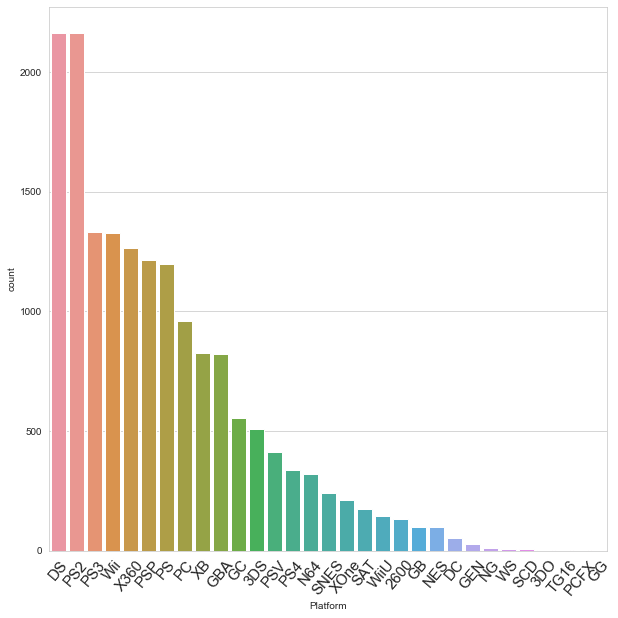

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(x="Platform",data=data, order = data['Platform'].value_counts().index)
plt.xticks(size=15, rotation = 50)

In [65]:
NA_Sales

Genre
Action          877.83
Adventure       105.80
Fighting        223.59
Misc            410.24
Platform        447.05
Puzzle          123.78
Racing          359.42
Role-Playing    327.28
Shooter         582.60
Simulation      183.31
Sports          683.35
Strategy         68.70
Name: NA_Sales, dtype: float64

0.49245889216226774

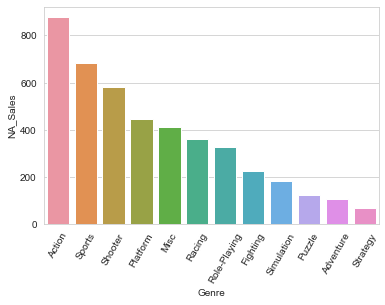

In [153]:
#Sales of gerne in NA
NA_Sales=data.groupby(by=['Genre'])['NA_Sales'].sum().reset_index()
NA_Sales=NA_Sales.sort_values(by=["NA_Sales"], ascending=False)
sns.barplot(x="Genre",y='NA_Sales',data=NA_Sales)
plt.xticks(rotation=60)
NA_Sales['NA_Sales'].sum()/data["Global_Sales"].sum()


0.27287106914008485

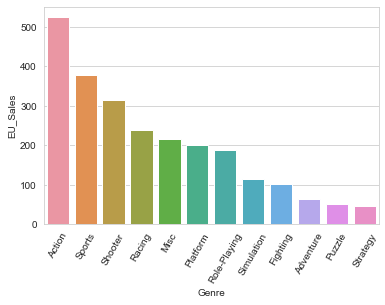

In [151]:
#Sales of gerne in EU
EU_Sales=data.groupby(by=['Genre'])['EU_Sales'].sum().reset_index()
EU_Sales=EU_Sales.sort_values(by=["EU_Sales"], ascending=False)
sns.barplot(x="Genre",y='EU_Sales',data=EU_Sales)
plt.xticks(rotation=60)
EU_Sales['EU_Sales'].sum()/data["Global_Sales"].sum()

0.1447260449036146

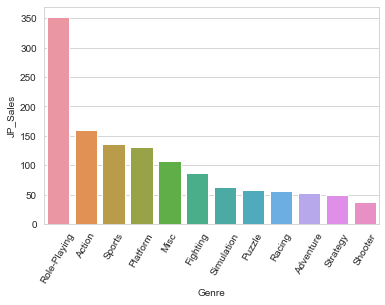

In [154]:
#Sales of gerne in EU
JP_Sales=data.groupby(by=['Genre'])['JP_Sales'].sum().reset_index()
JP_Sales=JP_Sales.sort_values(by=["JP_Sales"], ascending=False)
sns.barplot(x="Genre",y='JP_Sales',data=JP_Sales)
plt.xticks(rotation=60)
JP_Sales['JP_Sales'].sum()/data["Global_Sales"].sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

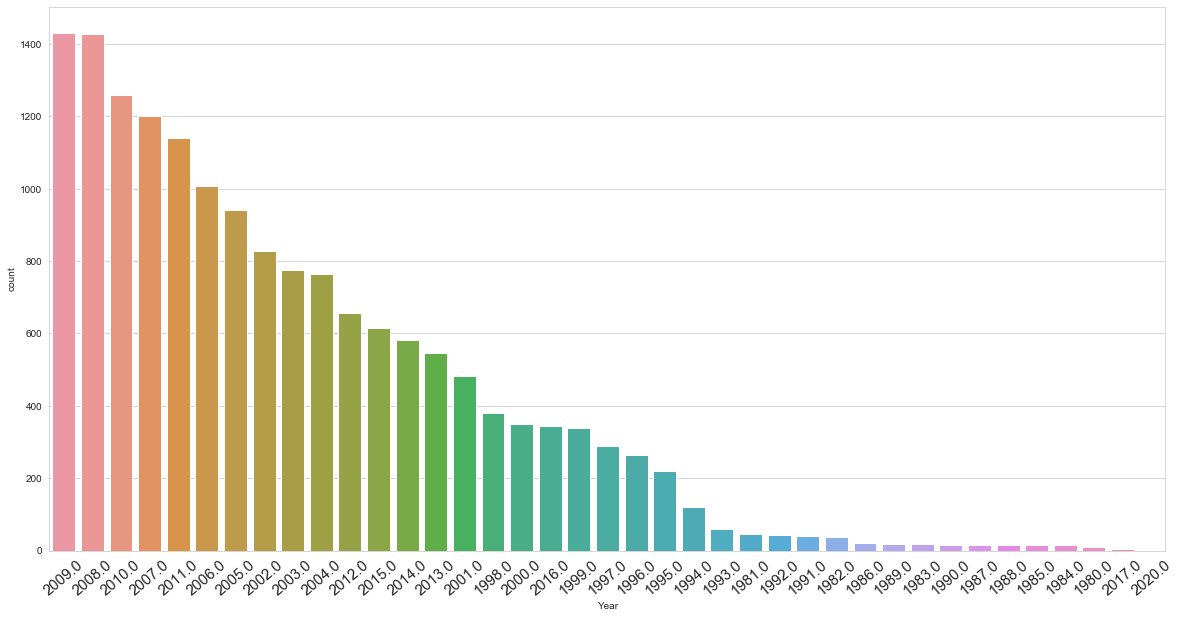

In [12]:
# The year that the most games are released
plt.figure(figsize=(20,10))
sns.countplot(x="Year", data=data,order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(size=15,rotation=40)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

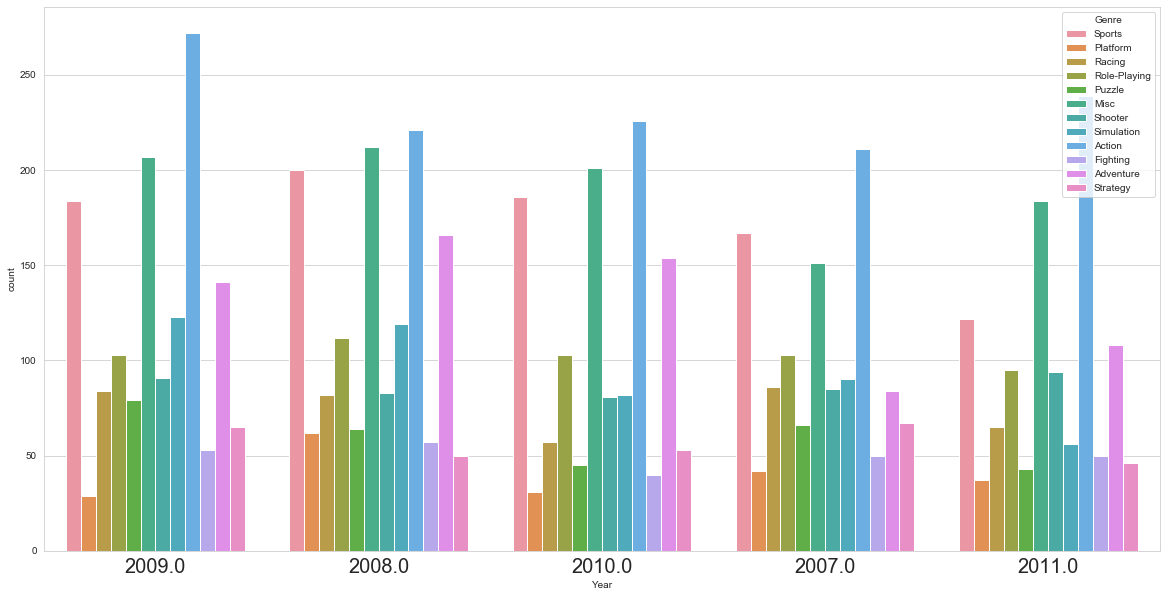

In [13]:
#3. Top 5 years that games are released by genre
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=data,hue = "Genre", order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text xticklabel objects>)

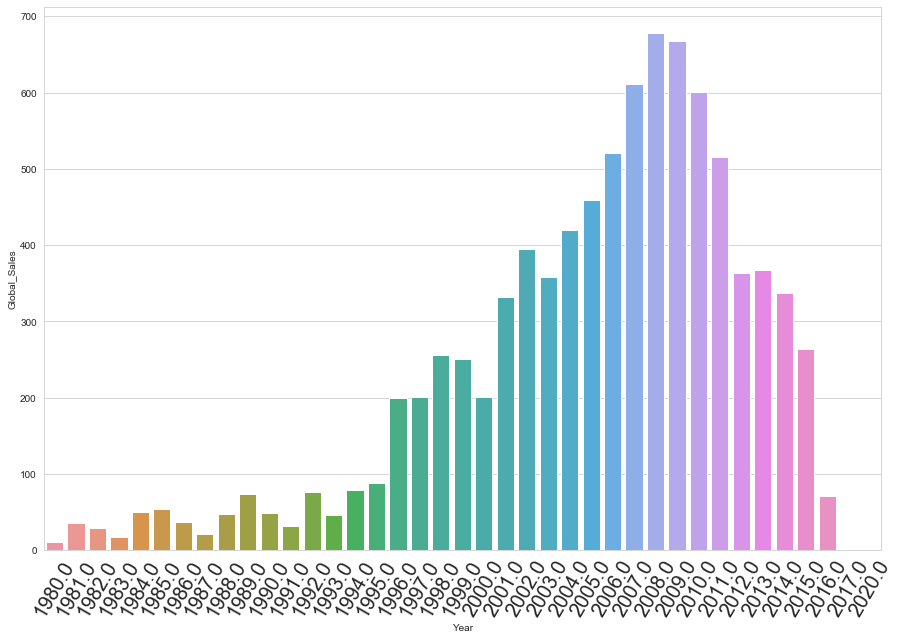

In [106]:
#4. The year that has the highest sales worldwide
high_sale_data=data.groupby(by=['Year'])['Global_Sales'].sum().reset_index()
high_sale_data
plt.figure(figsize=(15,10))
sns.barplot(x="Year", y="Global_Sales",data=high_sale_data)
plt.xticks(size=20,rotation=60)

In [15]:
# a single year that genre of game has been released the most

year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
# year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
# year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
# year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
# year_max_df

In [16]:
year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']

0      False
1      False
2       True
3      False
4      False
       ...  
384    False
385    False
386    False
387     True
388     True
Name: count, Length: 389, dtype: bool